In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#regresion, librerias especificas de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#EVALUACION  del modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
df= pd.read_csv('./DataSetAero.csv')
df.head()

,Género,Embarque en Línea,Servicio a Bordo,Servicio de Espacio para las Piernas,Manejo de Equipaje,Servicio de Registro,Servicio en Vuelo,cleanliness,Retraso en la Salida en Minutos,Retraso en la Llegada en Minutos
0,NaN,3,4,3,4,4,5,5,25,18.0
1,NaN,3,1,5,3,1,4,1,1,6.0
2,NaN,5,4,3,4,4,4,5,0,0.0
3,NaN,2,2,5,3,1,4,2,11,9.0
4,NaN,5,3,4,4,3,3,3,0,0.0


In [24]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Embarque en Línea                     103904 non-null  int64  
 1   Servicio a Bordo                      103904 non-null  int64  
 2   Servicio de Espacio para las Piernas  103904 non-null  int64  
 3   Manejo de Equipaje                    103904 non-null  int64  
 4   Servicio de Registro                  103904 non-null  int64  
 5   Servicio en Vuelo                     103904 non-null  int64  
 6   cleanliness                           103904 non-null  int64  
 7   Retraso en la Salida en Minutos       103904 non-null  int64  
 8   Retraso en la Llegada en Minutos      103904 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 7.1 MB


In [25]:
matriz_correlacacion = df.corr().abs()

Text(0.5, 1.0, 'Matiz de correlacion')

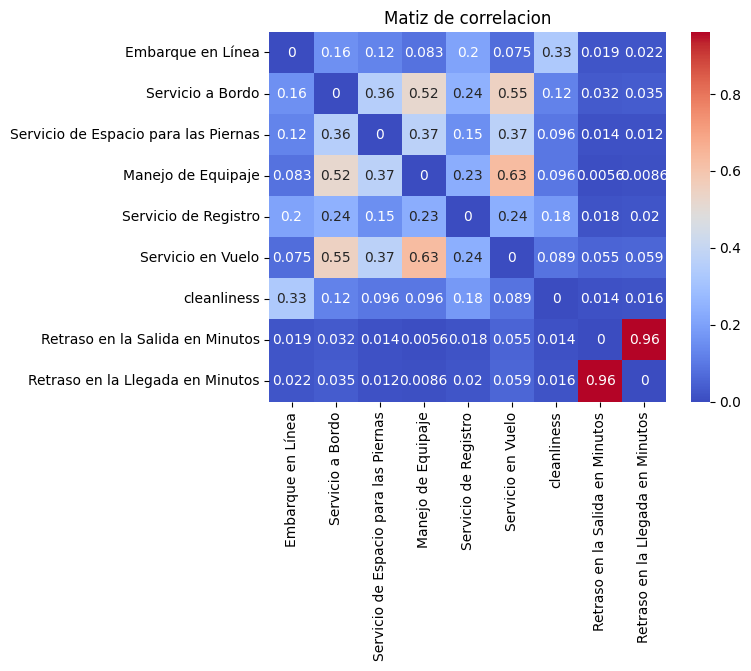

In [26]:
np.fill_diagonal(matriz_correlacacion.values, 0)

mas_correlacion = matriz_correlacacion.unstack().sort_values(ascending=False).drop_duplicates()


# plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacacion, annot=True, cmap='coolwarm')
plt.title('Matiz de correlacion')

In [27]:
df['promedio']=(df['Retraso en la Salida en Minutos'] + df['Servicio en Vuelo'])/2

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Embarque en Línea                     103904 non-null  int64  
 1   Servicio a Bordo                      103904 non-null  int64  
 2   Servicio de Espacio para las Piernas  103904 non-null  int64  
 3   Manejo de Equipaje                    103904 non-null  int64  
 4   Servicio de Registro                  103904 non-null  int64  
 5   Servicio en Vuelo                     103904 non-null  int64  
 6   cleanliness                           103904 non-null  int64  
 7   Retraso en la Salida en Minutos       103904 non-null  int64  
 8   Retraso en la Llegada en Minutos      103904 non-null  float64
 9   promedio                              103904 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 7.9 MB


In [28]:
df['tardo'] = np.where(df['promedio'] <= 7.5, 'Corto',
                       np.where(df['promedio'] <= 15, 'Medio', 'Largo'))



In [29]:
df['promedio']

0         15.0
1          2.5
2          2.0
3          7.5
4          1.5
          ... 
103899     3.0
103900     2.5
103901     6.0
103902     2.0
103903     1.5
Name: promedio, Length: 103904, dtype: float64

In [31]:
df['tardo']

0         Medio
1         Corto
2         Corto
3         Corto
4         Corto
          ...  
103899    Corto
103900    Corto
103901    Corto
103902    Corto
103903    Corto
Name: tardo, Length: 103904, dtype: object

Entraminedo del modelo

In [32]:
#seleccionas las variantes 
variables = ['Retraso en la Salida en Minutos','Servicio en Vuelo',  'Retraso en la Llegada en Minutos','Servicio de Registro']

X = df[variables]
y = df['tardo']

In [33]:
X_train, X_tests, y_train, y_tests = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_tests_scaled = scaler.transform(X_tests)

In [35]:
model = LogisticRegression(max_iter=1000)

In [36]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [37]:
#realizar predicccion

y_pred = model.predict(X_tests_scaled)

In [39]:

prediccion = accuracy_score(y_tests, y_pred)

print('la predicion del modelo es: ', prediccion)

la predicion del modelo es:  0.9997593956017516


In [40]:
#mariz de confunsion

matriz_confunsion = confusion_matrix(y_tests, y_pred)
print("Matriz de confusion")
print(matriz_confunsion)

Matriz de confusion
[[15516     0     0]
 [    0  3159     3]
 [    0     2  2101]]


In [41]:
#pickle

import pickle
with open('Model_regresion_logistica.pkl', 'wb') as file:
    pickle.dump(model, file)